In [5]:

#Data Collection and Cleaning
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('D:/python/JULY_COHORT-master/lesson7(Retail analysis)/onlinedata.csv')
df.head()

CPU times: total: 1.38 s
Wall time: 4.29 s


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
 9   Price        541909 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 41.3+ MB


In [4]:
df.value_counts()

Unnamed: 0  InvoiceNo  StockCode  Description                         Quantity  InvoiceDate      UnitPrice  CustomerID  Country         Price
0           536365     85123A     WHITE HANGING HEART T-LIGHT HOLDER  6         12/1/2010 8:26   2.55       17850.0     United Kingdom  15.30    1
368890      569000     21212      PACK OF 72 RETROSPOT CAKE CASES     24        9/29/2011 17:36  0.55       17015.0     United Kingdom  13.20    1
368888      569000     21977      PACK OF 60 PINK PAISLEY CAKE CASES  24        9/29/2011 17:36  0.55       17015.0     United Kingdom  13.20    1
368887      569000     85015      SET OF 12  VINTAGE POSTCARD SET     24        9/29/2011 17:36  0.65       17015.0     United Kingdom  15.60    1
368886      569000     23233      WRAP POPPIES  DESIGN                25        9/29/2011 17:36  0.42       17015.0     United Kingdom  10.50    1
                                                                                                                           

In [6]:
df.dtypes

Unnamed: 0       int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Price          float64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0          0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Price               0
dtype: int64

In [18]:
df['Revenue']=df['UnitPrice']*df['Quantity']
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate']).dt.date
df['InvoiceMonth']=pd.DatetimeIndex(df['InvoiceDate']).month
df['InvoiceYear']=pd.DatetimeIndex(df['InvoiceDate']).year
df.head()



,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,Revenue,InvoiceMonth,InvoiceYear
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,15.30,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,20.34,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,22.00,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,20.34,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,20.34,12,2010


In [22]:
df.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID,Price,Revenue,InvoiceMonth,InvoiceYear
count,541909.00000,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,270954.00000,9.552250,4.611114,15287.690570,17.987795,17.987795,7.553128,2010.921609
std,156435.79785,218.081158,96.759853,1713.600303,378.810824,378.810824,3.509055,0.268787
min,0.00000,-80995.000000,-11062.060000,12346.000000,-168469.600000,-168469.600000,1.000000,2010.000000
25%,135477.00000,1.000000,1.250000,13953.000000,3.400000,3.400000,5.000000,2011.000000
50%,270954.00000,3.000000,2.080000,15152.000000,9.750000,9.750000,8.000000,2011.000000
75%,406431.00000,10.000000,4.130000,16791.000000,17.400000,17.400000,11.000000,2011.000000
max,541908.00000,80995.000000,38970.000000,18287.000000,168469.600000,168469.600000,12.000000,2011.000000


AttributeError: 'numpy.int32' object has no attribute 'startswith'

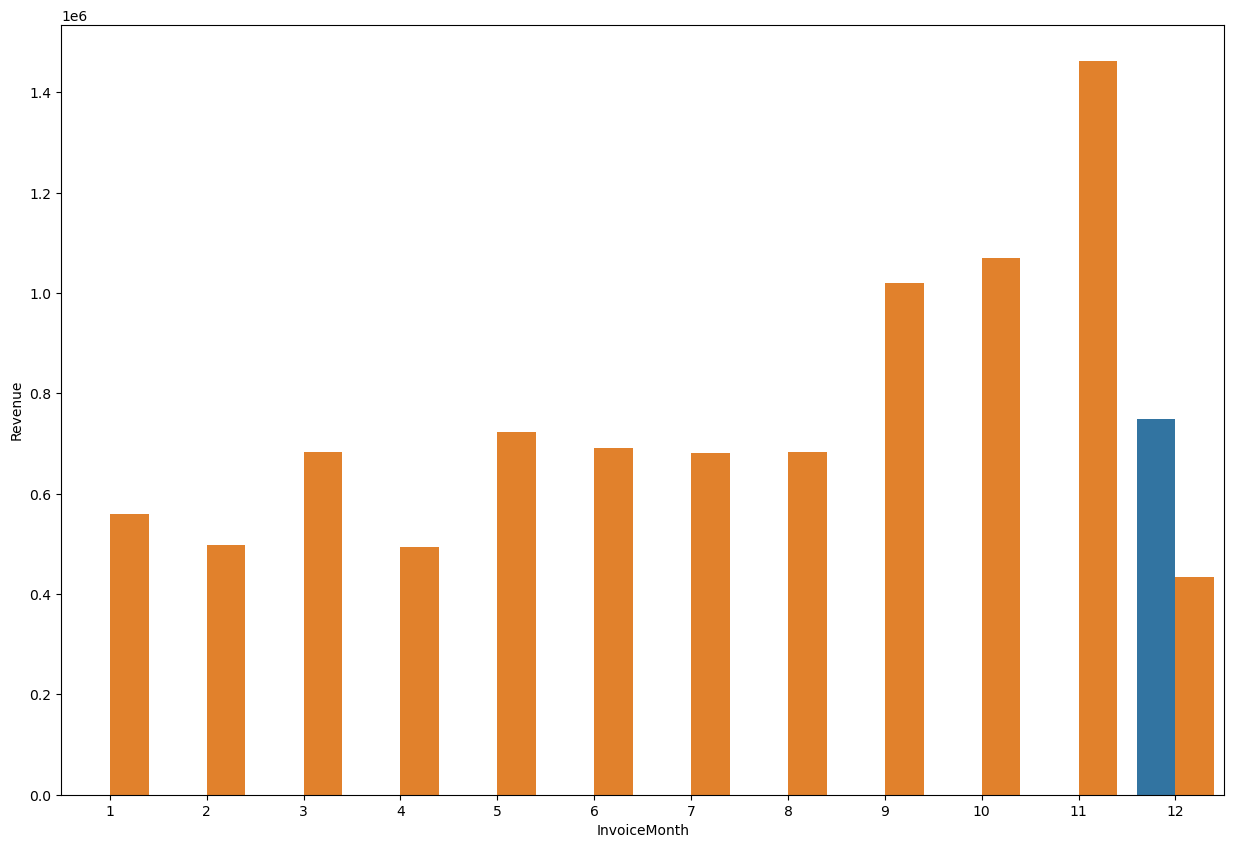

In [25]:
#Monthly Revenue Overview
%matplotlib inline
df_revenue=df.groupby(['InvoiceMonth','InvoiceYear'])['Revenue'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='Revenue',hue='InvoiceYear',data=df_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(32.983551826131695, 0.5, 'Revenue')

<Figure size 640x480 with 0 Axes>

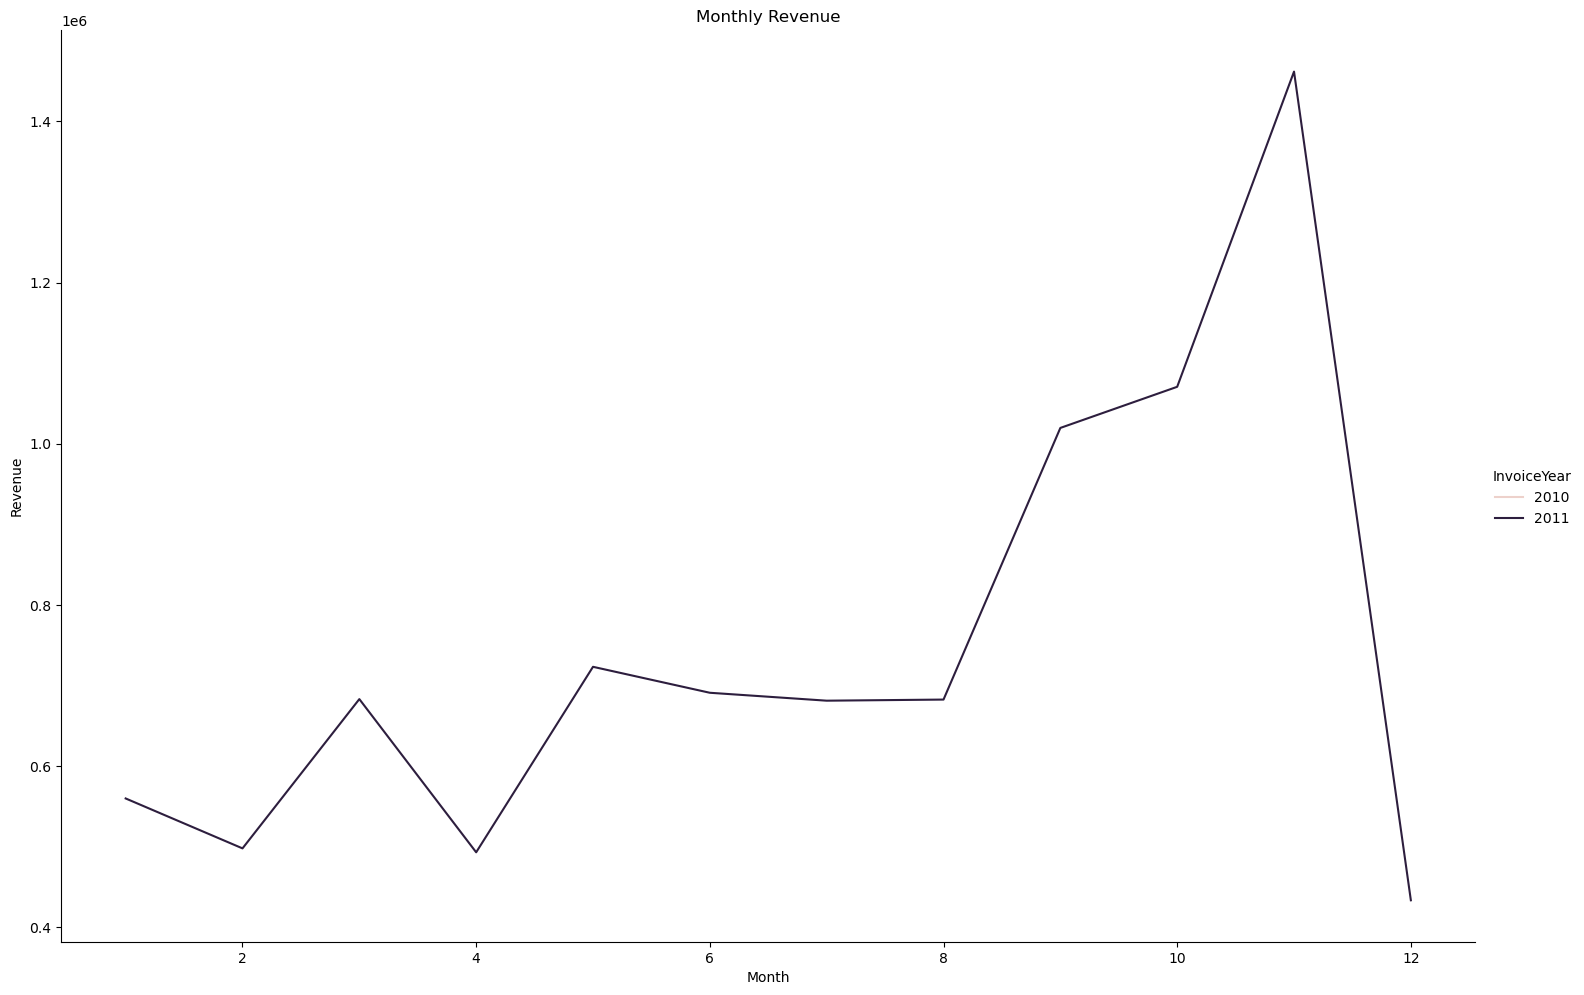

In [28]:
#Monthly Revenue Overview (lineplot)
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="InvoiceYear", kind="line", data=df_revenue, height=10, aspect=15/10)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")

In [31]:
#Look at the December 2011 data
df_december_2011=df.query('InvoiceMonth==12 and InvoiceYear==2011')
df_december_2011



,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,Revenue,InvoiceMonth,InvoiceYear
516384,516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01,4.15,13853.0,United Kingdom,-33.20,-33.20,12,2011
516385,516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01,1.25,15197.0,United Kingdom,-1.25,-1.25,12,2011
516386,516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01,0.82,15197.0,United Kingdom,-0.82,-0.82,12,2011
516387,516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01,0.85,15197.0,United Kingdom,-1.70,-1.70,12,2011
516388,516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01,25.00,13644.0,United Kingdom,-25.00,-25.00,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,10.20,12,2011
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,12.60,12,2011
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,16.60,12,2011
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,16.60,12,2011


Text(0, 0.5, 'Items Sold')

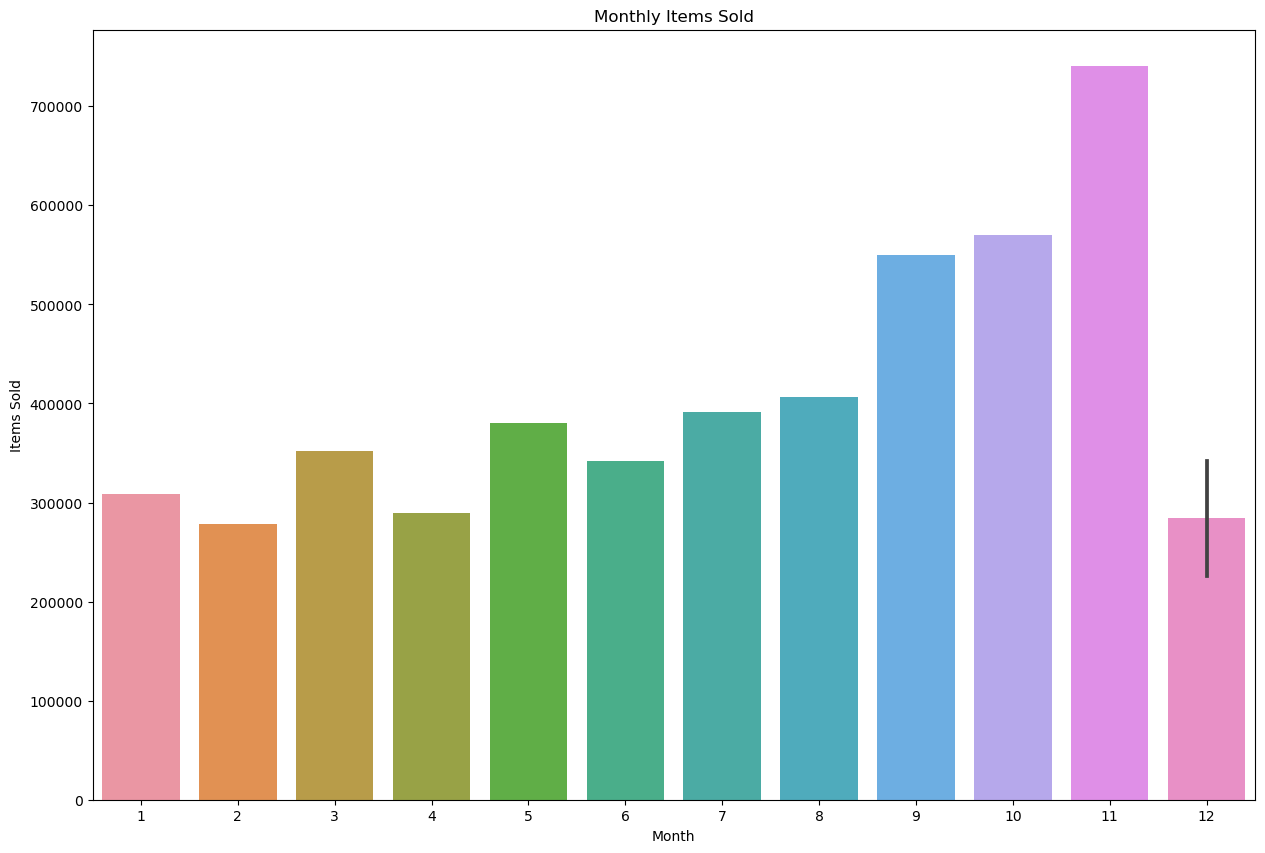

In [32]:
# Monthly Items Sold Overview

df_quantity=df.groupby(['InvoiceMonth','InvoiceYear'])['Quantity'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='Quantity',hue='InvoiceYear',data=df_quantity)
plt.title('Monthly Items Sold')
plt.xlabel('Month')
plt.ylabel('Items Sold')


In [33]:
df.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Price', 'Revenue',
       'InvoiceMonth', 'InvoiceYear'],
      dtype='object')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

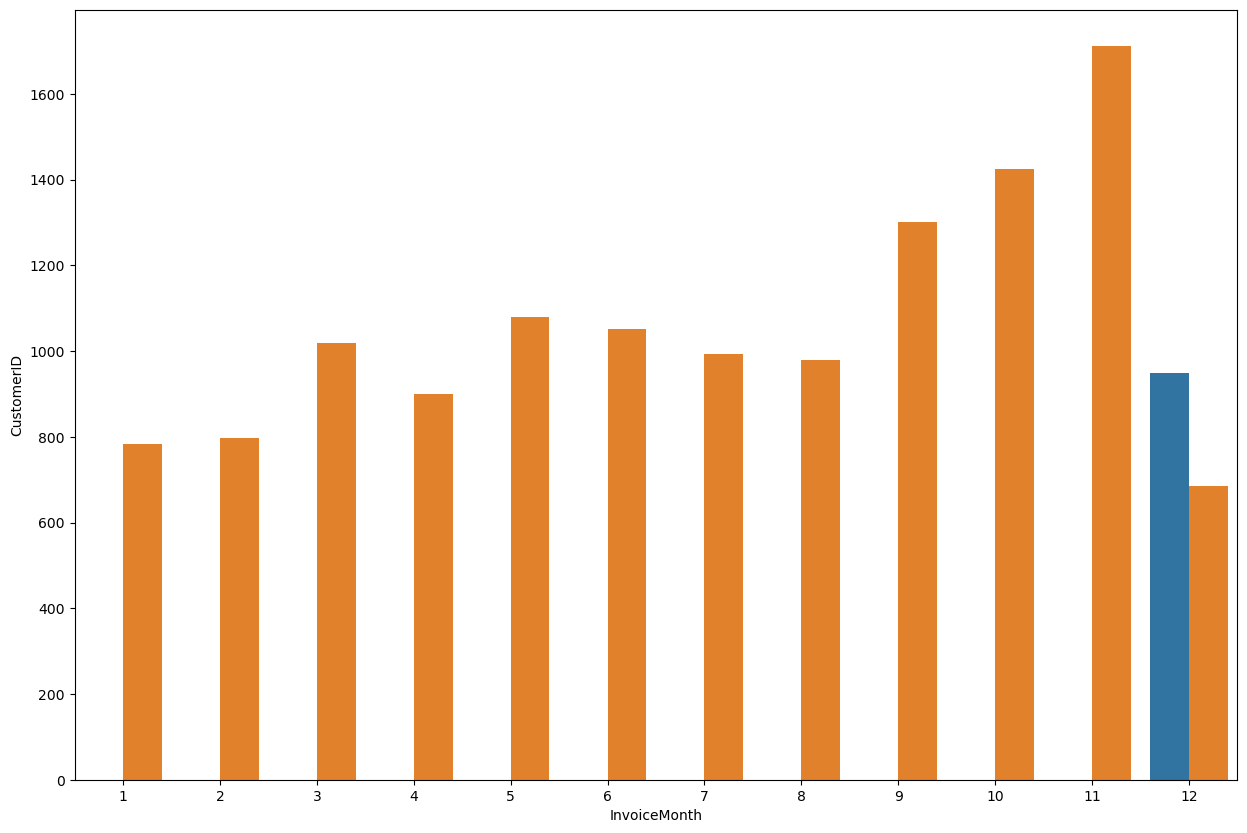

In [34]:
# Monthly Active Customers


df_active=df.groupby(['InvoiceMonth','InvoiceYear'])['CustomerID'].nunique().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='CustomerID',hue='InvoiceYear',data=df_active)
plt.title('Monthly Active users')
plt.xlabel('Month')
plt.ylabel('Active Users')

AttributeError: 'numpy.int32' object has no attribute 'startswith'

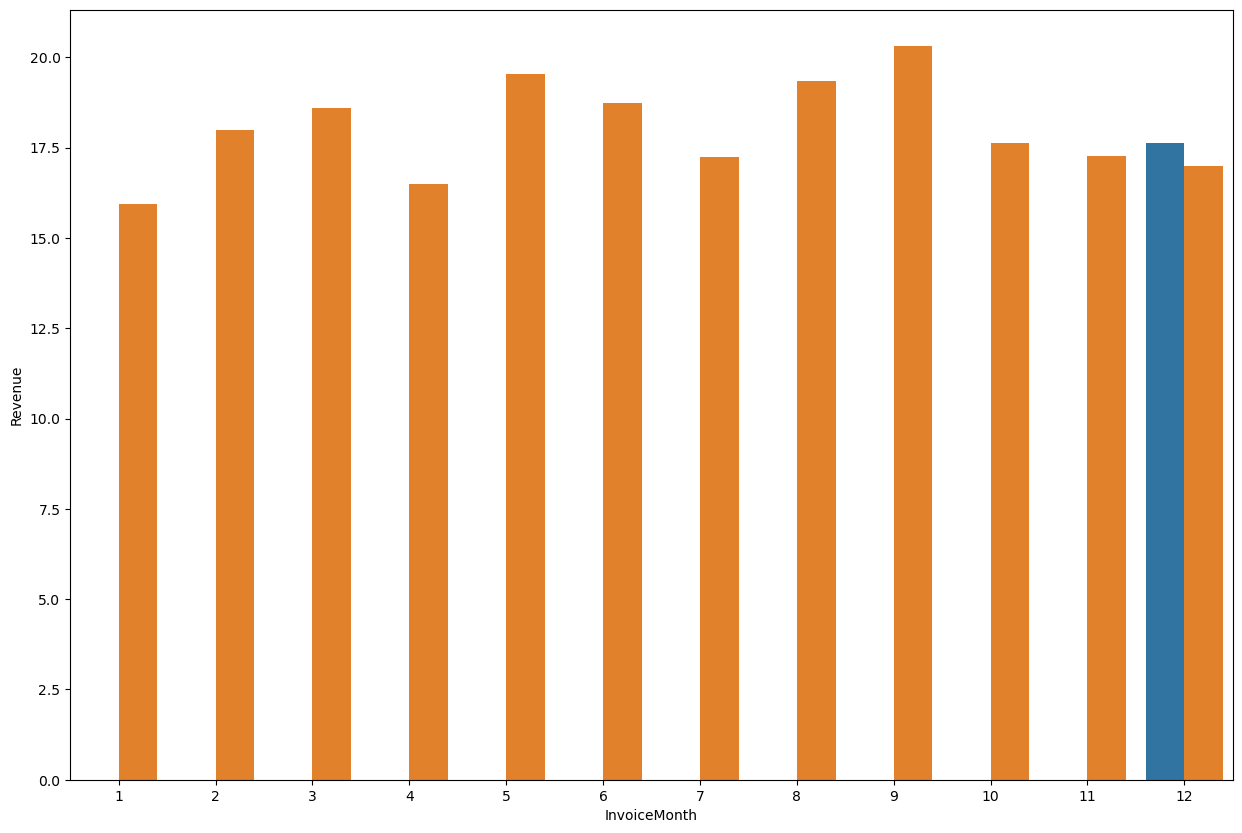

In [35]:
# Average Revenue per Month
df_revenue_avg=df.groupby(['InvoiceMonth','InvoiceYear'])['Revenue'].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='Revenue',hue='InvoiceYear',data=df_revenue_avg)
plt.title('Monthly Average Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')

In [36]:
df.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Price', 'Revenue',
       'InvoiceMonth', 'InvoiceYear'],
      dtype='object')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(32.22791280864197, 0.5, 'Revenue')

<Figure size 640x480 with 0 Axes>

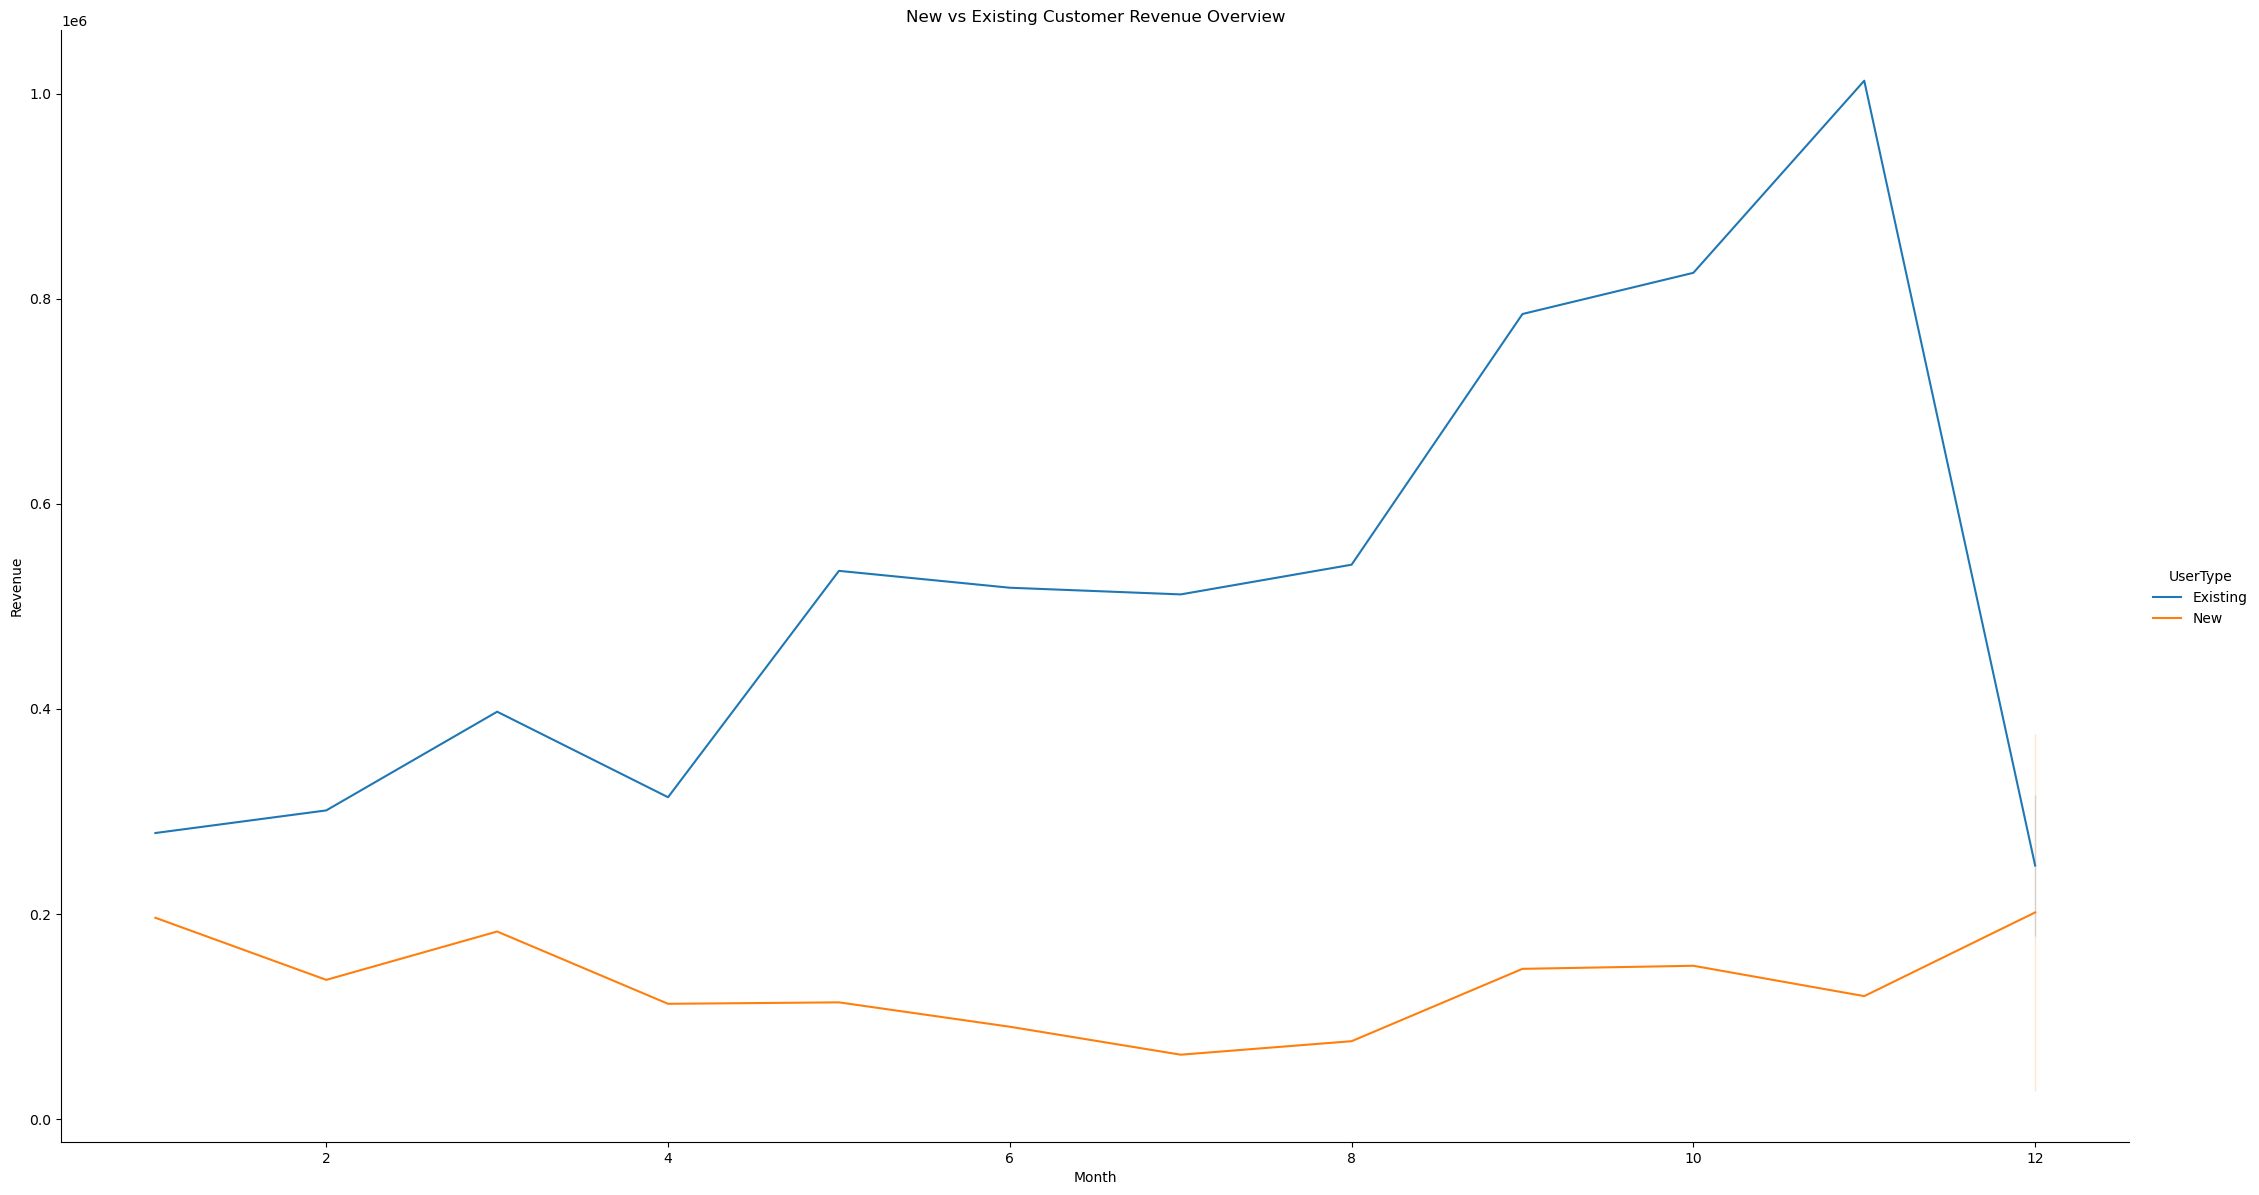

In [41]:
# New vs Existing Users
df_first_purchase=df.groupby(["CustomerID"])["InvoiceDate"].min().reset_index()
df_first_purchase.columns=["CustomerID", "FirstPurchaseDate"]
df=pd.merge(df, df_first_purchase, on="CustomerID")
df["UserType"]="New"
df.loc[df["InvoiceDate"]>df["FirstPurchaseDate"], "UserType"]="Existing"
df.head()
# New vs Existing User Revenue Analysis
df_new_revenue=df.groupby(["InvoiceMonth", "InvoiceYear", "UserType"])["Revenue"].sum().reset_index()
plt.figure()
sns.relplot(x="InvoiceMonth", y="Revenue", hue="UserType", data=df_new_revenue, kind="line", height=12, aspect=18/10)
plt.title("New vs Existing Customer Revenue Overview")
plt.xlabel("Month")
plt.ylabel("Revenue")

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:/python/JULY_COHORT-master/lesson7(Retail analysis)/onlinedata.csv')

# Create a DataFrame with unique CustomerID
df_user = pd.DataFrame(df['CustomerID'].unique())
df_user.columns = ['CustomerID']

# Group by CustomerID and get the last purchase date
df_last_purchase = df.groupby(['CustomerID'])['InvoiceDate'].max().reset_index()
df_last_purchase.columns = ['CustomerID', 'LastPurchaseDate']

# Calculate Recency
df_last_purchase['LastPurchaseDate'] = pd.to_datetime(df_last_purchase['LastPurchaseDate'])
df_last_purchase['Recency'] = (df_last_purchase['LastPurchaseDate'].max() - df_last_purchase['LastPurchaseDate']).dt.days
df_recency = pd.merge(df_user, df_last_purchase[['CustomerID', 'Recency']], on='CustomerID')
df_recency.head()


,CustomerID,Recency
0,17850.0,301
1,13047.0,126
2,12583.0,69
3,13748.0,95
4,15100.0,366


Text(4.944444444444445, 0.5, 'Customer Count')

<Figure size 1500x1000 with 0 Axes>

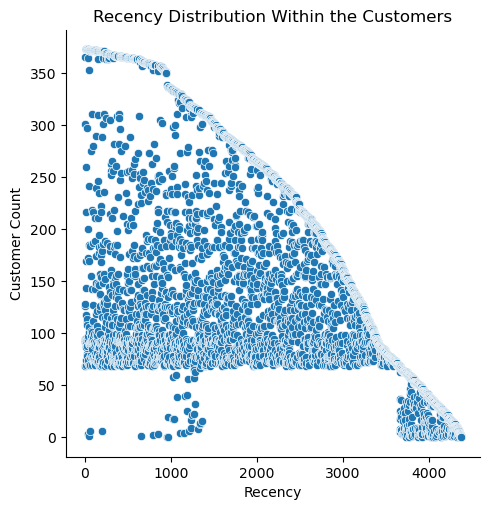

In [13]:
#relational plot of recency distribution
plt.figure(figsize=(15,10))
sns.relplot(df_recency['Recency'])
plt.title("Recency Distribution Within the Customers")
plt.xlabel("Recency")
plt.ylabel("Customer Count")

C:\Users\HP\AppData\Local\Temp\ipykernel_13304\268924328.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_recency["Recency"])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Customer Count')

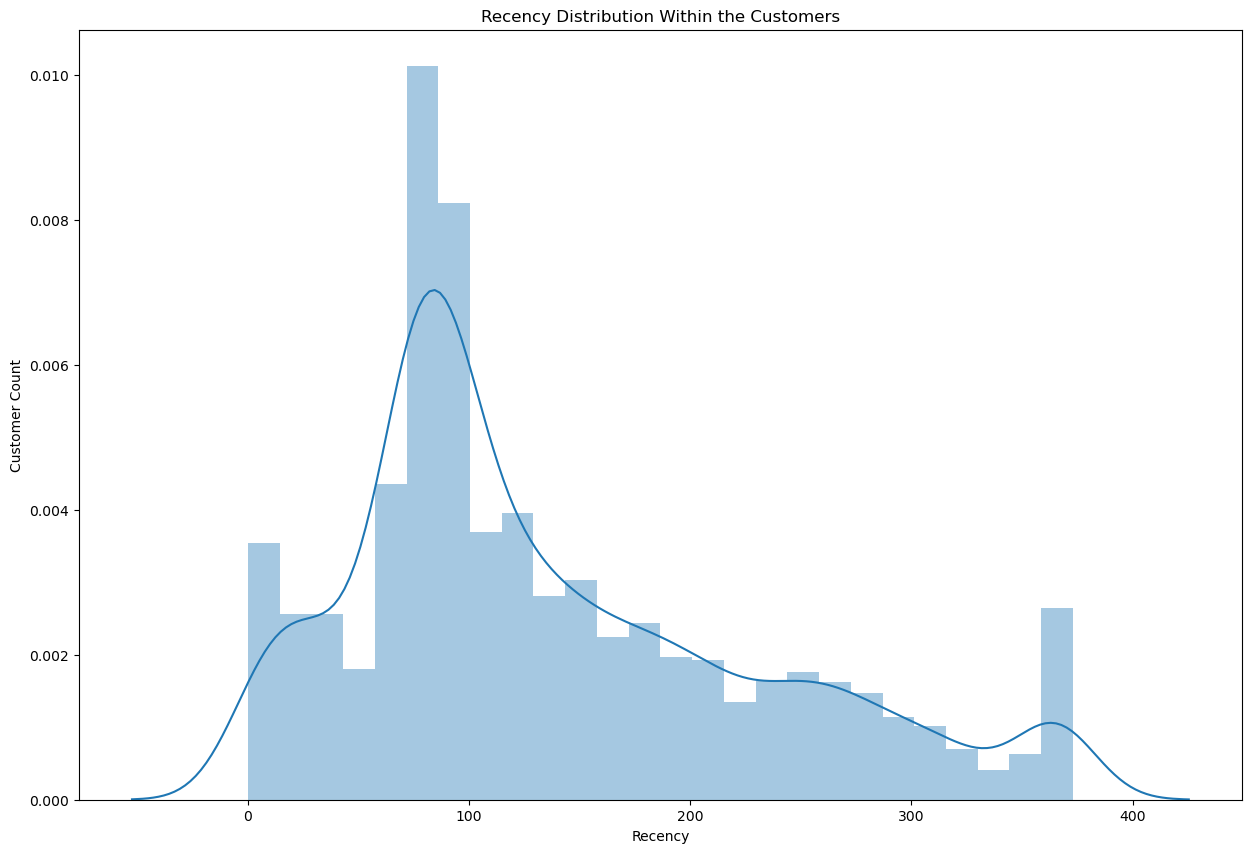

In [14]:
#Recency Distribution Within the Customers
plt.figure(figsize=(15,10))
sns.distplot(df_recency["Recency"])
plt.title("Recency Distribution Within the Customers")
plt.xlabel("Recency")
plt.ylabel("Customer Count")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

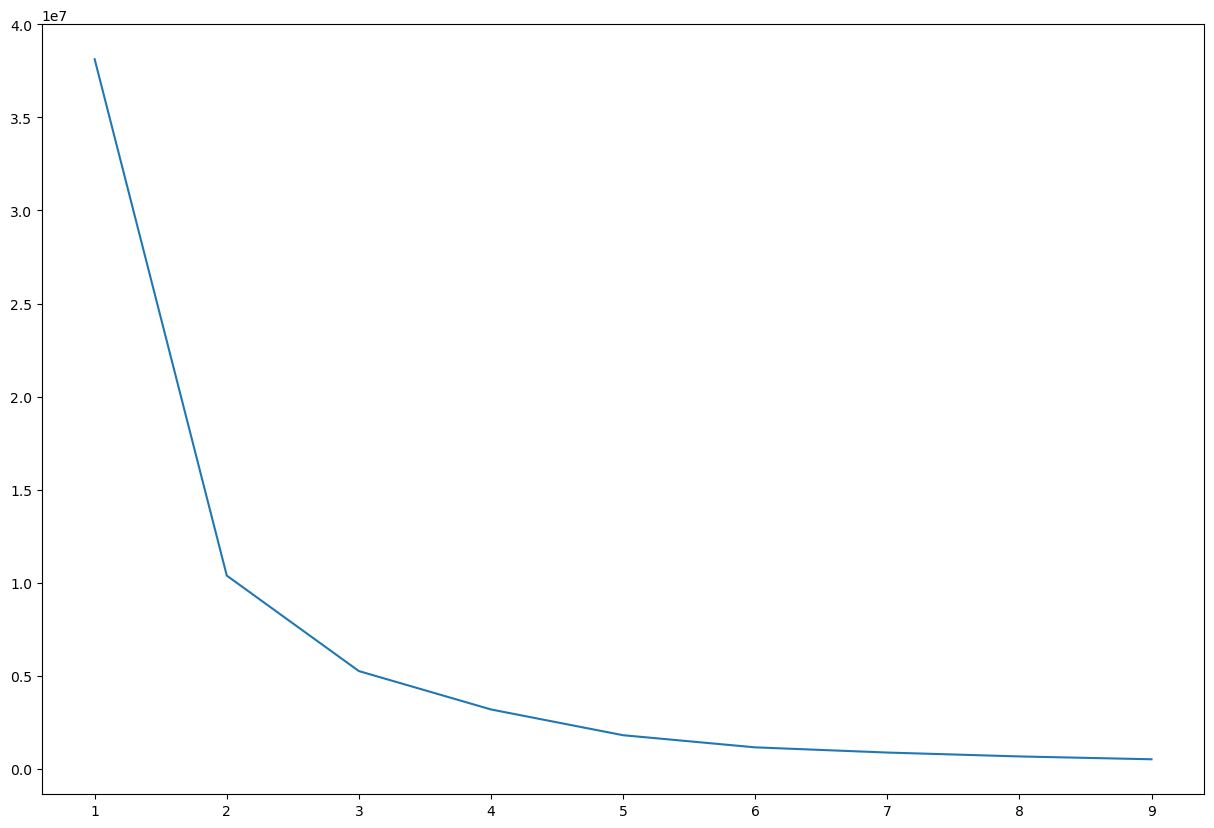

In [17]:
# use KMeans Clustering for Recency Clustering
from sklearn.cluster import KMeans
# find out how many clusters are optimal
y=df_recency[["Recency"]] # label what we are clustering
dic={} # store the clustering values in a dictionary
for k in range(1,10):
    kmeans=KMeans(n_clusters=k, max_iter=1000).fit(y)
    y["clusters"]=kmeans.labels_
    dic[k]=kmeans.inertia_
plt.figure(figsize=(15,10))
plt.plot(list(dic.keys()), list(dic.values()))
plt.show()

In [22]:
# Cluster Customer based on Recency
kmodel_recency=KMeans(n_clusters=4)
kmodel_recency.fit(y)
kpredict_recency=kmodel_recency.predict(y)
kpredict_recency[0:5]
df_recency["RecencyCluster"]=kpredict_recency
df_recency.head()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Recency,RecencyCluster
0,17850.0,301,2
1,13047.0,126,0
2,12583.0,69,0
3,13748.0,95,0
4,15100.0,366,2


In [ ]:
# Cluster Customer based on Recency
kmodel_recency=KMeans(n_clusters=4)
kmodel_recency.fit(y)
kpredict_recency=kmodel_recency.predict(y)
kpredict_recency[0:5]
df_recency["RecencyCluster"]=kpredict_recency
df_recency.head()

In [24]:
# get statistical analysis for each cluster
df_recency.groupby(["RecencyCluster"])["Recency"].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1001.0,189.418581,31.090668,142.0,162.0,185.0,214.0,249.0
1,663.0,310.398190,41.751438,250.0,273.0,303.0,358.5,373.0
2,664.0,24.823795,16.913246,0.0,9.0,23.0,38.0,58.0
3,2044.0,93.330235,20.733421,59.0,77.0,90.0,107.0,141.0


In [21]:
# frequency of orders
df_frequency=df.groupby(['CustomerID'])['InvoiceDate'].count().reset_index()
df_frequency.columns=['CustomerID','Frequency']
df_frequency=pd.merge(df_user,df_frequency,on='CustomerID')
df_frequency.head()



,CustomerID,Frequency
0,17850.0,312
1,13047.0,196
2,12583.0,251
3,13748.0,28
4,15100.0,6


C:\Users\HP\AppData\Local\Temp\ipykernel_13304\2138438656.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_frequency.query('Frequency<1000')['Frequency'])
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

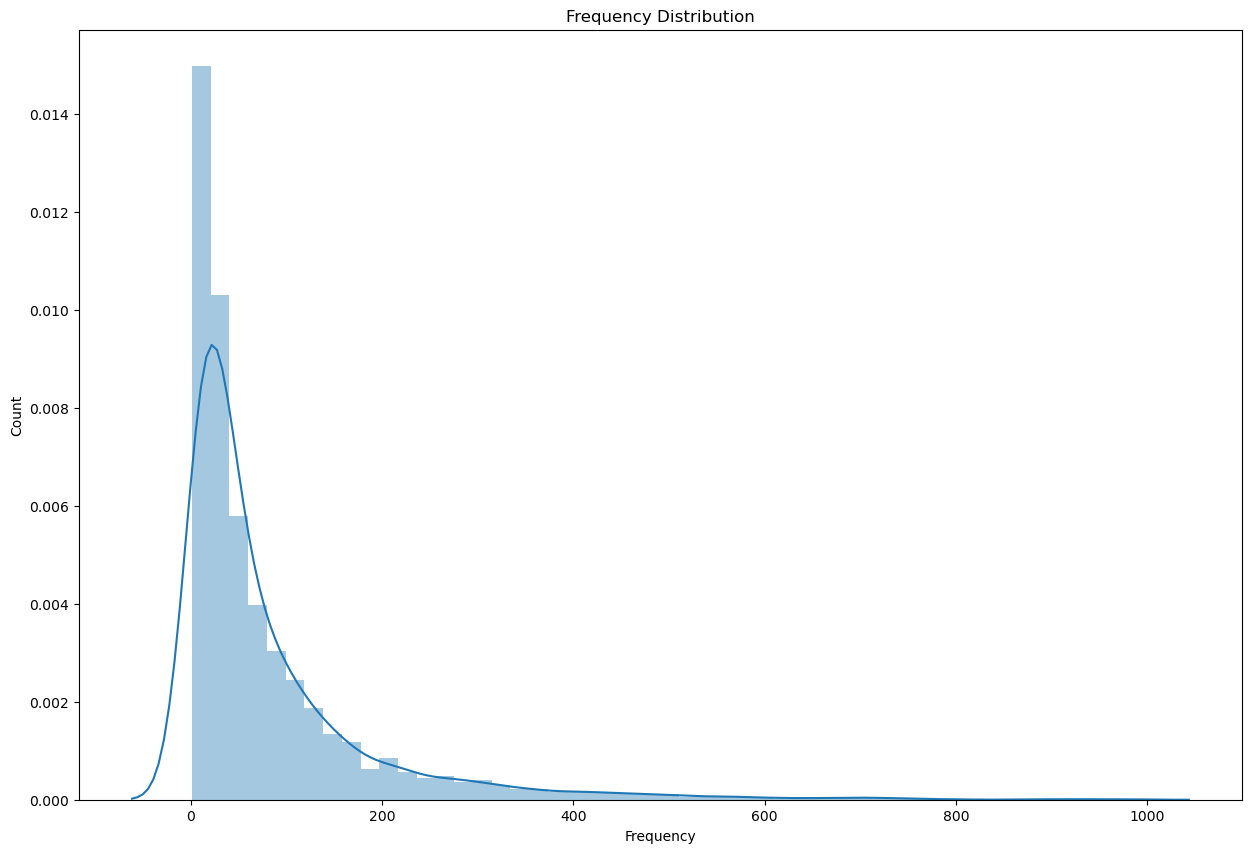

In [25]:
# Review of Frequency Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_frequency.query('Frequency<1000')['Frequency'])
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

In [26]:
# Customer Segmentation based on Frequency
x=df_frequency[["Frequency"]]
k_model_frequency=KMeans(n_clusters=4)
k_model_frequency.fit(x)
k_model_frequency_predict=k_model_frequency.predict(x)
df_frequency["FrequencyCluster"]=k_model_frequency_predict
df_frequency.head()
# Statistical Analysis of clusters based on frequency
df_frequency.groupby(["FrequencyCluster"])["Frequency"].describe()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3862.0,49.753755,44.812998,1.0,15.0,34.0,73.0,189.0
1,4.0,5914.000000,1473.845537,4642.0,5006.5,5515.5,6423.0,7983.0
2,482.0,329.107884,132.670589,190.0,228.0,286.0,393.5,803.0
3,24.0,1349.750000,508.637759,872.0,1003.5,1156.0,1541.0,2782.0


In [ ]:
#segment  customers based on their monetary value
df_customer_revenue=df.groupby(["CustomerID"])["Revenue"].sum().reset_index()
df_customer_revenue=pd.merge(df_user, df_customer_revenue, on="CustomerID")
df_customer_revenue.head()
# Revenue Distribution
plt.figure(figsize=(15,10))
sns.distplot(df_customer_revenue.query("Revenue < 10000")["Revenue"])

In [ ]:
# Segmenting Customers Based on their Monetary Value
a=df_customer_revenue[["Revenue"]]
k_model_revenue=KMeans(n_clusters=4)
k_model_revenue.fit(a)
k_model_revenue_pred=k_model_revenue.predict(a)
df_customer_revenue["RevenueCluster"]=k_model_revenue_pred
df_customer_revenue.groupby(["RevenueCluster"])["Revenue"].describe()